In [93]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
from tqdm import tqdm

In [94]:
import utils2p

In [95]:
NOTEBOOK_DIR = os.getcwd()
MODULE_DIR, _ = os.path.split(NOTEBOOK_DIR)
sys.path.append(MODULE_DIR)

In [4]:
from longterm import load, utils

In [76]:
# fly_dir = os.path.join(load.NAS_DIR_JB, "210301_J1xCI9", "Fly1")
# trial_dir = os.path.join(fly_dir, "014_vol_cc_CO2")
fly_dir = os.path.join(load.NAS2_DIR_JB, "210527_J1xCI9", "Fly4")
trial_dir = os.path.join(fly_dir, "003_zstack_cc_CO2_GG")  # 001_zstack_cc_CO2_GR, 002_zstack_cc_CO2_GR

twop_dir = os.path.join(trial_dir, "2p")
processed_dir = os.path.join(trial_dir, load.PROCESSED_FOLDER)

In [77]:
trial_xml = utils2p.find_metadata_file(trial_dir)
trial_raw = utils2p.find_raw_file(trial_dir) 
meta_data = utils2p.Metadata(trial_xml)

In [78]:
green, red = utils2p.load_raw(path=trial_raw, metadata=meta_data)

In [79]:
green.shape

(2, 601, 480, 736)

In [80]:
N_t, N_z, N_y, N_x = green.shape

In [81]:
os.makedirs(processed_dir)

In [82]:
utils2p.save_img(os.path.join(processed_dir, "green.tif"), green)
utils2p.save_img(os.path.join(processed_dir, "red.tif"), red)

In [83]:
green_avg_T = np.mean(green, axis=0)
red_avg_T = np.mean(red, axis=0)

In [84]:
green_avg_T.shape

(601, 480, 736)

In [85]:
utils2p.save_img(os.path.join(processed_dir, "green_avg.tif"), green_avg_T)
utils2p.save_img(os.path.join(processed_dir, "red_avg.tif"), red_avg_T)

In [86]:
green_avg_T_Y = np.mean(green_avg_T, axis=1)
green_avg_T_Z = np.mean(green_avg_T, axis=0)
green_avg_T_X = np.mean(green_avg_T, axis=2)
red_avg_T_Y = np.mean(red_avg_T, axis=1)
red_avg_T_Z = np.mean(red_avg_T, axis=0)
red_avg_T_X = np.mean(red_avg_T, axis=2)

<IPython.core.display.Javascript object>


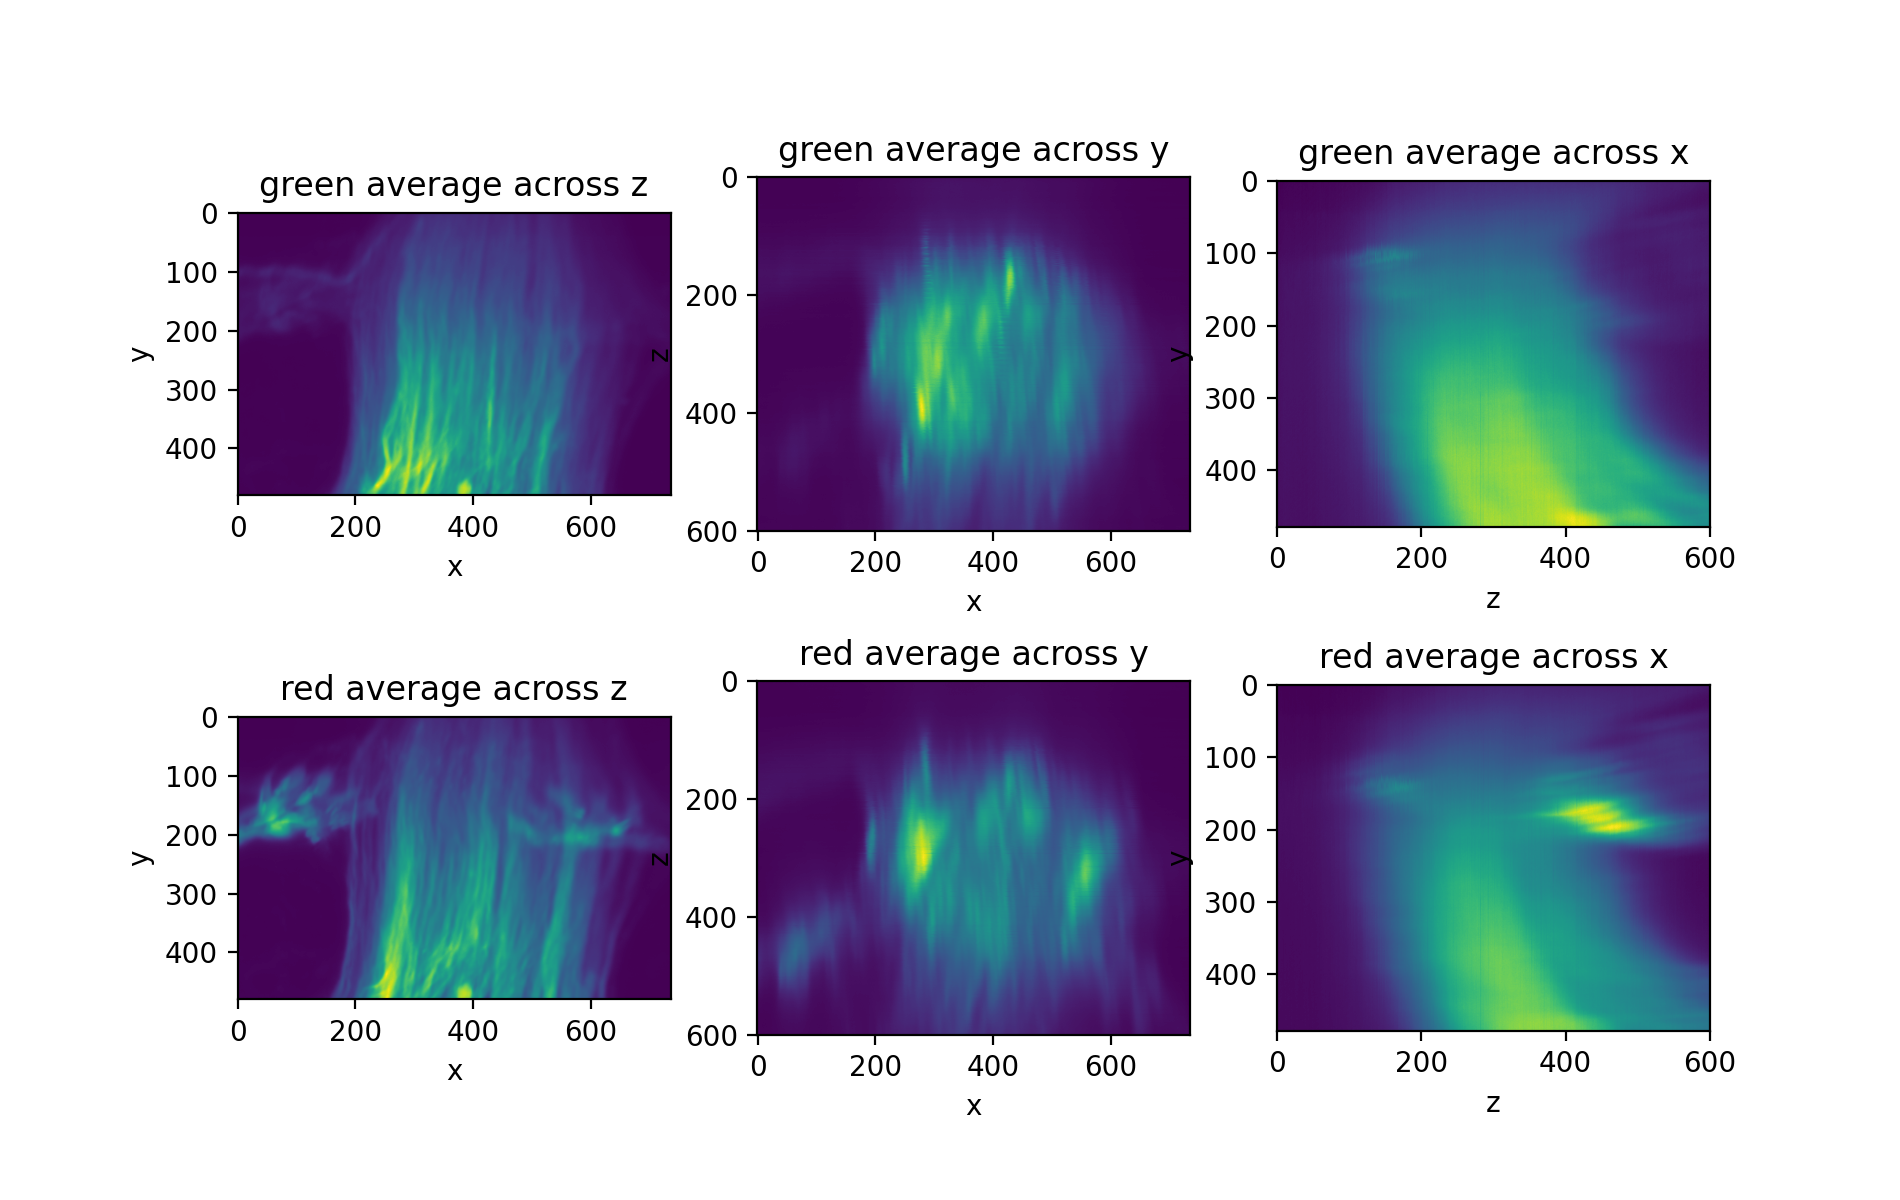

Text(0.5, 1.0, 'red average across x')

In [96]:
%matplotlib notebook
fig, axs = plt.subplots(2,3, figsize=(9.5, 6))
axs[0,0].imshow(green_avg_T_Z)
axs[0,0].set_xlabel("x")
axs[0,0].set_ylabel("y")
axs[0,0].set_title("green average across z")
axs[0,1].imshow(green_avg_T_Y)
axs[0,1].set_xlabel("x")
axs[0,1].set_ylabel("z")
axs[0,1].set_title("green average across y")
axs[0,2].imshow(green_avg_T_X.T)
axs[0,2].set_xlabel("z")
axs[0,2].set_ylabel("y")
axs[0,2].set_title("green average across x")

axs[1,0].imshow(red_avg_T_Z)
axs[1,0].set_xlabel("x")
axs[1,0].set_ylabel("y")
axs[1,0].set_title("red average across z")
axs[1,1].imshow(red_avg_T_Y)
axs[1,1].set_xlabel("x")
axs[1,1].set_ylabel("z")
axs[1,1].set_title("red average across y")
axs[1,2].imshow(red_avg_T_X.T)
axs[1,2].set_xlabel("z")
axs[1,2].set_ylabel("y")
axs[1,2].set_title("red average across x")

<IPython.core.display.Javascript object>


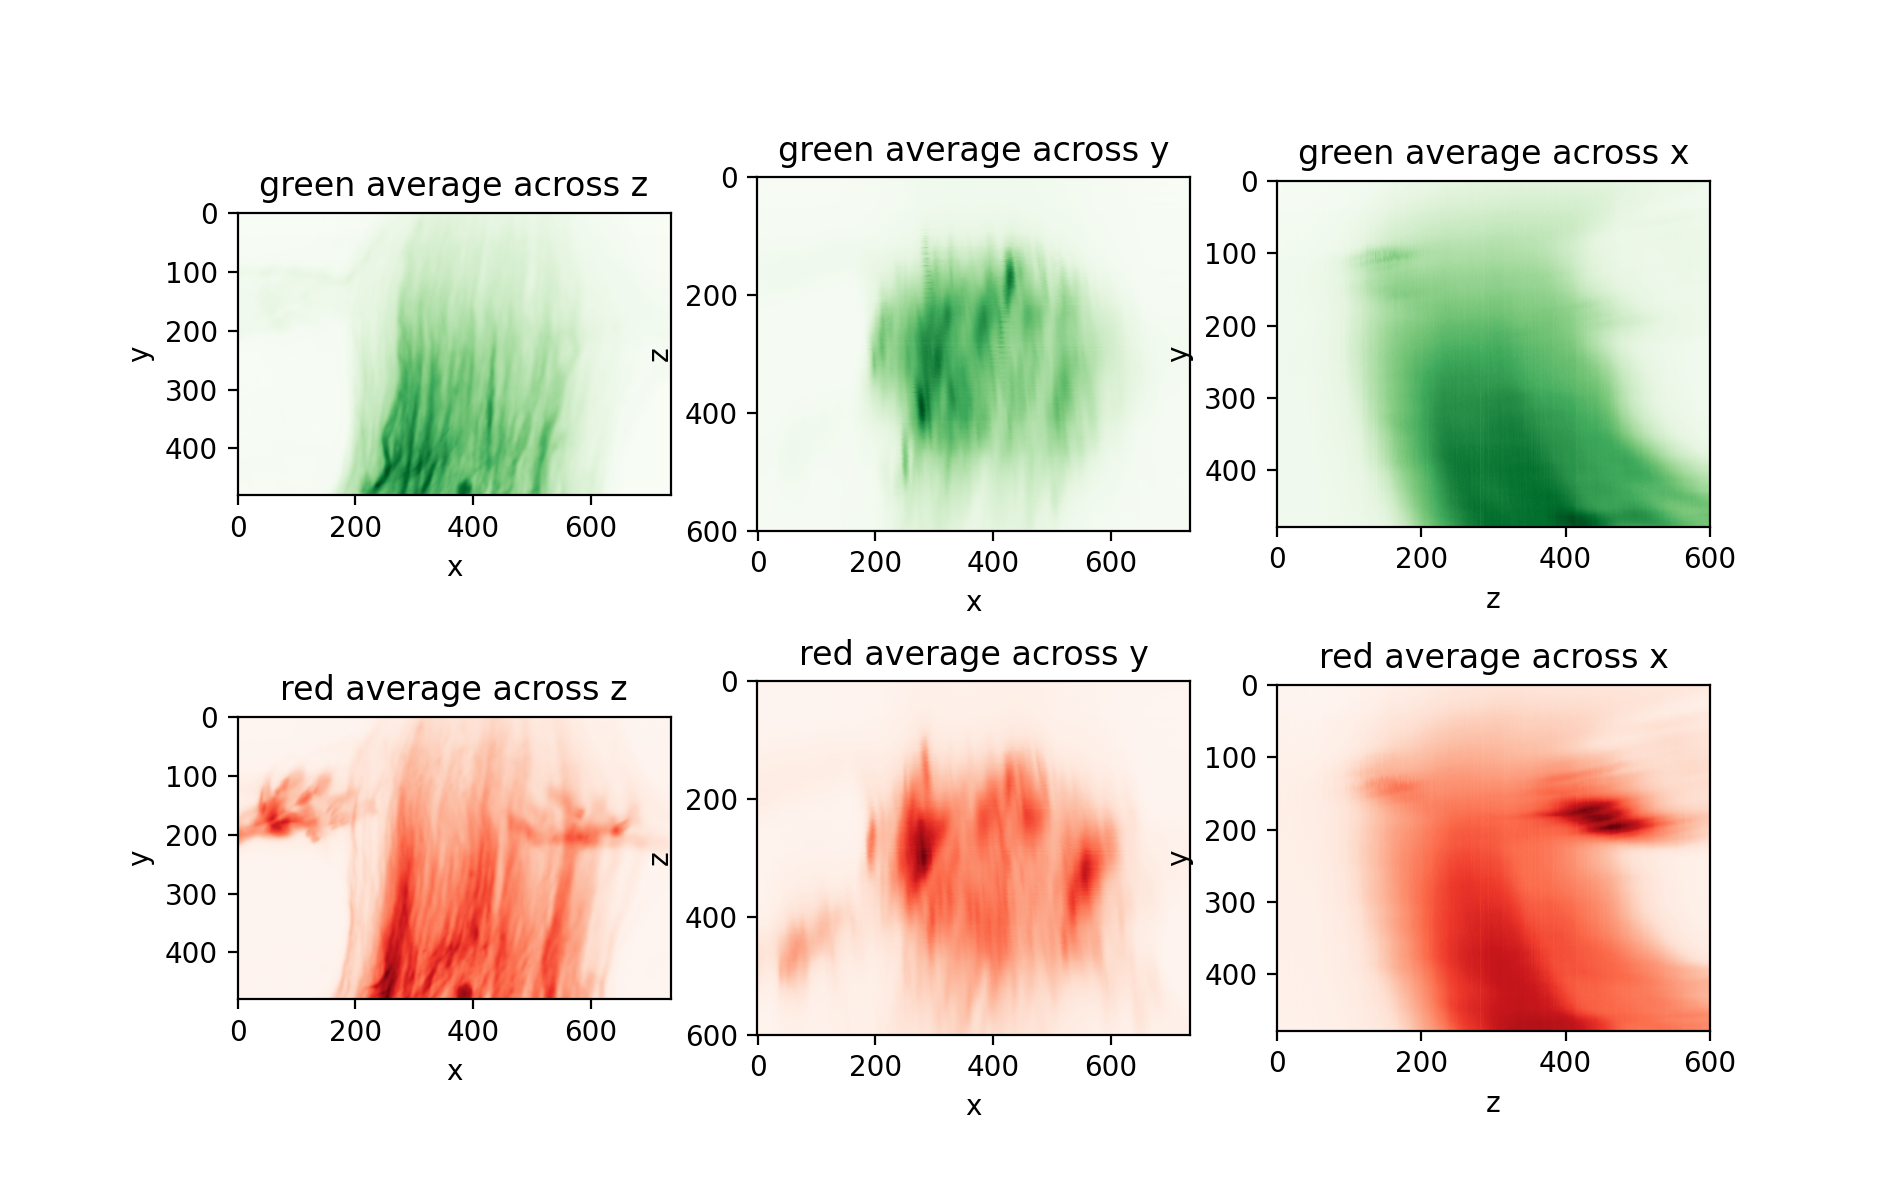

Text(0.5, 1.0, 'red average across x')

In [88]:
%matplotlib notebook
fig, axs = plt.subplots(2,3, figsize=(9.5, 6))
axs[0,0].imshow(green_avg_T_Z, cmap=plt.cm.get_cmap("Greens"))
axs[0,0].set_xlabel("x")
axs[0,0].set_ylabel("y")
axs[0,0].set_title("green average across z")
axs[0,1].imshow(green_avg_T_Y, cmap=plt.cm.get_cmap("Greens"))
axs[0,1].set_xlabel("x")
axs[0,1].set_ylabel("z")
axs[0,1].set_title("green average across y")
axs[0,2].imshow(green_avg_T_X.T, cmap=plt.cm.get_cmap("Greens"))
axs[0,2].set_xlabel("z")
axs[0,2].set_ylabel("y")
axs[0,2].set_title("green average across x")

axs[1,0].imshow(red_avg_T_Z, cmap=plt.cm.get_cmap("Reds"))
axs[1,0].set_xlabel("x")
axs[1,0].set_ylabel("y")
axs[1,0].set_title("red average across z")
axs[1,1].imshow(red_avg_T_Y, cmap=plt.cm.get_cmap("Reds"))
axs[1,1].set_xlabel("x")
axs[1,1].set_ylabel("z")
axs[1,1].set_title("red average across y")
axs[1,2].imshow(red_avg_T_X.T, cmap=plt.cm.get_cmap("Reds"))
axs[1,2].set_xlabel("z")
axs[1,2].set_ylabel("y")
axs[1,2].set_title("red average across x")

In [89]:
from longterm.plot import videos

In [90]:
offset = 60
videos.make_video_2p(green_avg_T[offset:,:,:], out_dir=processed_dir, video_name="zstack.mp4", 
                     red=red_avg_T[offset:,:,:], percentiles=(5,99), frames=None, frame_rate=60, trial_dir=None)

541it [00:04, 119.09it/s]


In [91]:
videos.make_video_2p(green_avg_T.T, out_dir=processed_dir, video_name="xstack.mp4", 
                     red=red_avg_T.T, percentiles=(5,99), frames=None, frame_rate=60, trial_dir=None)

736it [00:08, 86.77it/s]


In [92]:
videos.make_video_2p(np.transpose(green_avg_T, (1,0,2)), out_dir=processed_dir, video_name="ystack.mp4", 
                     red=np.transpose(red_avg_T, (1,0,2)), percentiles=(5,99), frames=None, frame_rate=60, trial_dir=None)

480it [00:05, 93.69it/s]
